# <center>1. Разведочный анализ данных (EDA)</center>

**Задача**

По данным о пациентах из файла *chronic.csv* научиться предсказывать наличие у пациента заболевания почек.

In [107]:
# Импорт библиотеки pandas для работы с табличными данными.
import pandas as pd

In [108]:
# Открываем данные.
kidney_df = pd.read_csv('data/chronic.csv')
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [109]:
# Выведем названия всех признаков в таблице.
kidney_df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

Таблица представляет собой *csv* файл, содержащий следующие столбцы:

* `age`: возраст пациента в годах.
* `bp`: артериальное давление, представляемое как систолическое над диастолическим (например, 120/80 мм рт.ст.).
* `sg`: относительная плотность мочи, мера концентрации растворенных веществ в моче.
* `al`: уровень альбумина в моче, который может указывать на функции или повреждение почек.
* `su`: уровень сахара в моче, который может быть важен для диагностики диабета или проблем с почками.
* `rbc`: число эритроцитов в моче, что может указывать на кровотечение или повреждение почек.
* `pc`: клетки гноя в моче, указывающие на инфекцию или воспаление в мочевыводящих путях.
* `pcc`: количество клеток гноя, более специфическая мера числа клеток гноя.
* `ba`: бактерии в моче, указывающие на инфекцию мочевых путей.
* `bgr`: уровень глюкозы в крови, важный для диагностики диабета.
* `bu`: азот мочевины в крови, мера функции почек и метаболизма белков.
* `sc`: сывороточный креатинин, важный показатель функции почек.
* `sod`: уровень натрия в сыворотке, который может указывать на баланс жидкости и электролитов.
* `pot`: уровень калия в сыворотке, критически важный для функций сердца и мышц.
* `hemo`: уровень гемоглобина, который может указывать на анемию.
* `pcv`: объем клеток или гематокрит, представляющий долю объема крови, занимаемую эритроцитами.
* `wc`: общее количество лейкоцитов, которое может указывать на инфекцию или воспаление.
* `rc`: количество эритроцитов, мера анемии или состояния крови.
* `htn`: статус гипертензии, закодированный как да (1) или нет (0).
* `dm`: статус сахарного диабета, кодируется как да (1) или нет (0).
* `cad`: статус коронарной болезни сердца, кодируется как да (1) или нет (0).
* `appet`: статус аппетита, кодируется как нормальный, плохой или отсутствующий.
* `pe`: периферические отеки, указывающие на задержку жидкости, кодируются как присутствуют (1) или отсутствуют (0).
* `ane`: статус анемии, кодируется как да (1) или нет (0).
* `class`: классификация статуса хронической болезни почек (ХБП) (болеет или нет).

In [110]:
# Проверяем на дубликаты.
kidney_df.duplicated().sum()

0

In [111]:
# Посмотрим информацию о признаках.
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

Несмотря на то, что в таблице представлены числовые значения, они закодированы как класс *object*. Следовательно признаки `'age'`, `'bp'`, `'sg'`, `'al'`, `'su'`, `'bgr'`, `'bu'`, `'sc'`, `'sod'`, `'pot'`, `'hemo'`, `'pcv'`, `'wc'`, `'rc'` нам необходимо перевести в класс *int* или *float* в зависимости от значений.

Также сразу бросается, что пропусков будто бы нет, хотя пропущенные значения видно ещё на этапе визуализации таблицы (обозначены символом `?`). 

In [112]:
# Импорт библиотеки numpy для работы с массивами и числовыми операциями.
import numpy as np

In [113]:
# Создадим функцию для изменения типа данных в числовых столбцах.
def replace_value(value: object) -> float:
    """Функция для преобразования значений в столбце
    
    Args: 
        значения типа object

    Returns:
       значения типа float64
    """
    
    if value == '?':
        return np.NaN
    else:
        return float(value)

In [114]:
# Создадим переменную с именами числовых столбцов, которые нам надо преобразовать.
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

In [115]:
# Цикл, который будет перебирать список с числовыми столбцами и применять к ним нашу функцию по изменению типа данных.
for i in num_cols:
    kidney_df[i] = kidney_df[i].apply(replace_value)

In [116]:
# Заменим символ '?', на NaN, в оставшихся категориальных столбцах.
kidney_df = kidney_df.replace('?', np.NaN)

In [117]:
# Посмотрим, что получилось.
kidney_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [118]:
# Посмотрим информацию о признаках, после преобразований.
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wc      294 non-null    float64
 17  rc      269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [119]:
# Посмотрим статистики числовых признаков.
kidney_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.48,17.17,2.0,42.00,55.00,64.50,90.00
bp,388.0,76.47,13.68,50.0,70.00,80.00,80.00,180.00
sg,353.0,1.02,0.01,1.0,1.01,1.02,1.02,1.02
al,354.0,1.02,1.35,0.0,0.00,0.00,2.00,5.00
su,351.0,0.45,1.10,0.0,0.00,0.00,0.00,5.00
bgr,356.0,148.04,79.28,22.0,99.00,121.00,163.00,490.00
bu,381.0,57.43,50.50,1.5,27.00,42.00,66.00,391.00
sc,383.0,3.07,5.74,0.4,0.90,1.30,2.80,76.00
sod,313.0,137.53,10.41,4.5,135.00,138.00,142.00,163.00
pot,312.0,4.63,3.19,2.5,3.80,4.40,4.90,47.00


В описании к таблице, к сожалению, не сказано в каких единицах измеряются те или иные признаки. 

Признак `'bp'`, в описании сказано: "артериальное давление, представляемое как систолическое над диастолическим (например, 120/80 мм рт. ст.).
". В таблице этот признак представлен всего одной цифрой. Можно предположить, что это среднее АД, которое высчитывается по формуле: СрАД = 1/3 * САД + 2/3 * ДАД. Нормальными показателями среднего артериального давления считаются значения от 70 до 110 мм рт. ст..

Касательно остальных числовых признаков, не известно в каких единицах измерения они представлены, можем только предполагать, поэтому оставим их как есть.

In [120]:
# Посмотрим статистики категорийных признаков.
kidney_df.describe(include='object').T

,count,unique,top,freq
rbc,248,2,normal,201
pc,335,2,normal,259
pcc,396,2,notpresent,354
ba,396,2,notpresent,374
htn,398,2,no,251
dm,398,3,no,261
cad,398,2,no,364
appet,399,2,good,317
pe,399,2,no,323
ane,399,2,no,339


В глаза бросается, что у признака `'dm'` (статус сахарного диабета) почему-то 3 уникальных значения.

In [121]:
# Подсчитаем кол-во значений внутри всех признаков.
for col in kidney_df.columns:
    print(f'Признак: {kidney_df[col].value_counts(dropna=False)}')
    print('-' * 40)

Признак: age
60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
90.0     1
27.0     1
83.0     1
4.0      1
79.0     1
Name: count, Length: 77, dtype: int64
----------------------------------------
Признак: bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
NaN       12
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64
----------------------------------------
Признак: sg
1.020    106
1.010     84
1.025     81
1.015     75
NaN       47
1.005      7
Name: count, dtype: int64
----------------------------------------
Признак: al
0.0    199
NaN     46
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
----------------------------------------
Признак: su
0.0    290
NaN     49
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64
----------------------------------------
Признак: rbc
normal      201
NaN         152
abnormal     47
Name: count, dtype: int64
---------

В ходе просмотра выше выведенных данных, было найдено 3 выброса:
1) Пациент, у которого `'sod'` (уровень натрия в сыворотке) = 4.5
2) 2 пациента с признаком `'pot'` (уровень калия в сыворотке) = 39 и 47
3) 1 ошибка в записи категориального признака `'dm'` (статус сахарного диабета). У одного пациента статус записан c пробелом ' yes', вместо 'yes'.

In [122]:
# Проверим перый выброс.
kidney_df[kidney_df['sod'] == 4.5].T

,21
age,60.0
bp,90.0
sg,NaN
al,NaN
su,NaN
rbc,NaN
pc,NaN
pcc,notpresent
ba,notpresent
bgr,NaN


Помимо аномального значения, в данных этого пациента много пропусков.

In [123]:
# Посмотрим на два других выброса.
kidney_df[kidney_df['pot'] > 8].T

,61,128
age,67.0,52.0
bp,80.0,90.0
sg,1.01,1.015
al,1.0,4.0
su,3.0,3.0
rbc,normal,normal
pc,abnormal,abnormal
pcc,notpresent,notpresent
ba,notpresent,notpresent
bgr,182.0,224.0


У пациента 61 много пропусков в данных. А у пациента 128, помимо того, что много отклонений в анализах, `'pot'` = 47 явно указывает на то, что это либо выброс, либо неправильно записанный результат. Может быть значение должно было быть 4.7. Учитывая, что у нас медицинские данные, проще воспринимать это как выброс, чем строить догадки.

In [124]:
# Посмотрим на пациента с неправильно записанным признаком 'dm'.
kidney_df[kidney_df['dm'] == ' yes'].T

,30
age,NaN
bp,70.0
sg,NaN
al,NaN
su,NaN
rbc,NaN
pc,NaN
pcc,notpresent
ba,notpresent
bgr,93.0


Кроме неправильно записанного значения `'dm'`, у пациента очень много пропусков в данных.

In [125]:
# Удалим строки с найденными выбросами.
kidney_df = kidney_df.drop(index=[21, 30, 61, 128])

In [126]:
# Посмотрим на кол-во пропусков в столбцах.
kidney_df.isna().sum()

age        8
bp        12
sg        45
al        44
su        47
rbc      150
pc        63
pcc        4
ba         4
bgr       43
bu        19
sc        17
sod       87
pot       87
hemo      50
pcv       69
wc       104
rc       129
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [127]:
# Посмотрим на пациента, у которого отсутствует информация в столбце 'ane'.
kidney_df[kidney_df['ane'].isna()].T

,294
age,75.0
bp,60.0
sg,1.02
al,0.0
su,0.0
rbc,normal
pc,normal
pcc,notpresent
ba,notpresent
bgr,110.0


Признак `'ane'` - статус анемии. У данного  пациента `'hemo'` (уровень гемоглобина) и `'rc'` (количество эритроцитов) в пределах нормы. Следавателььно, мы можем сделать вывод, что у него `'ane'` = no. 

Также у этого пациента отсутствуют значения в признаках `'appet'` (статус аппетита, кодируется как нормальный, плохой или отсутствующий) и `'pe'` (периферические отеки). Проанализировав всю информацию о нём, мы можем предположить, что это здоровый пожилой пациент, у которого вряд ли есть отёки. Следавательно, мы можем сделать вывод, что у него `'appet'` = good, `'pe'` = no. 

In [128]:
# Уберем предупреждения, чтобы они не загромождали вывод.
import warnings
warnings.filterwarnings('ignore')

In [129]:
# Заменим значения.
kidney_df['ane'].replace(np.NaN, 'no', inplace=True)
kidney_df['appet'].replace(np.NaN, 'good', inplace=True)
kidney_df['pe'].replace(np.NaN,'no', inplace=True)

In [130]:
# Посмотрим на пациентов, у которых отсутствует информация в столбце 'cad'.
kidney_df[kidney_df['cad'].isna()].T

,288,297
age,56.0,53.0
bp,70.0,60.0
sg,1.025,1.025
al,0.0,0.0
su,0.0,0.0
rbc,normal,normal
pc,normal,normal
pcc,notpresent,notpresent
ba,notpresent,notpresent
bgr,70.0,116.0


У пациента 288 кроме `'wc'` (общее количество лейкоцитов) = 11000, других отклонений нет. Из чего мы можем сделать вывод, что `'htn'` (статус гипертензии) = no, `'dm'` (статус сахарного диабета) = no, `'cad'` (статус коронарной болезни сердца) = no.	
У пациента 297 все показатели в пределах референсных значений.

In [131]:
# Заменим значения.
kidney_df['htn'].replace(np.NaN, 'no', inplace=True)
kidney_df['dm'].replace(np.NaN, 'no', inplace=True)
kidney_df['cad'].replace(np.NaN,'no', inplace=True)

In [132]:
# Посмотрим на пациентов, у которых отсутствует информация в столбце 'pcc'.
kidney_df[kidney_df['pcc'].isna()].T

,290,300,316,328
age,54.0,45.0,35.0,28.0
bp,70.0,60.0,NaN,70.0
sg,1.02,1.02,1.02,1.02
al,0.0,0.0,0.0,0.0
su,0.0,0.0,0.0,0.0
rbc,NaN,normal,normal,normal
pc,NaN,normal,normal,normal
pcc,NaN,NaN,NaN,NaN
ba,NaN,NaN,NaN,NaN
bgr,76.0,114.0,99.0,131.0


У пациента 290 внести изменения на основе его данных не получится. А вот у остальных трёх, учитывая, что все остальные показатели в пределах нормы, можем предположить, что `'pcc'` (количество клеток гноя) и `'ba'` (бактерии в моче) = notpresent.

К сожалению, значения `'bp'` у пациента 316 и `'hemo'` у пациента 328 мы заполнить не можем. Это индивидуальные показатели, которые на основе предоставленных данных мы не можем высчитать или предположить.

In [133]:
# Изменяем данные пациента 300.
kidney_df.at[300, 'pcc'] = 'notpresent'
kidney_df.at[300, 'ba'] = 'notpresent'

In [134]:
# Изменяем данные пациента 316.
kidney_df.at[316, 'pcc'] = 'notpresent'
kidney_df.at[316, 'ba'] = 'notpresent'

In [135]:
# Изменяем данные пациента 328.
kidney_df.at[328, 'pcc'] = 'notpresent'
kidney_df.at[328, 'ba'] = 'notpresent'

В остальных столбцах слишком много пропущенных значений, чтобы перебирать их вручную.

In [136]:
# Посмотрим на процентное соотношение пропусков в столбцах.
cols_null_percent = kidney_df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(round(cols_with_null, 2))

rbc     37.88
rc      32.58
wc      26.26
sod     21.97
pot     21.97
pcv     17.42
pc      15.91
hemo    12.63
su      11.87
sg      11.36
al      11.11
bgr     10.86
bu       4.80
sc       4.29
bp       3.03
age      2.02
ba       0.25
pcc      0.25
dtype: float64

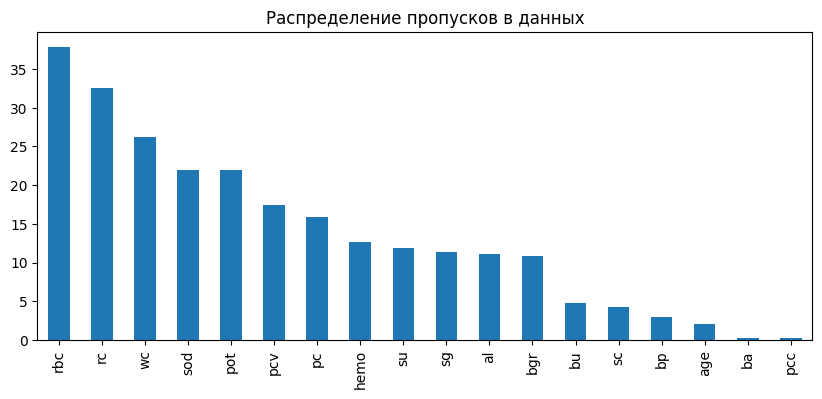

In [ ]:
# Визуализируем эту информацию.
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в признаках'
);

In [138]:
# Cоздаем копию исходной таблицы.
drop_df = kidney_df.copy()
# Задаем минимальный порог (вычисляем 75% от числа строк).
thresh = drop_df.shape[0]*0.75
# Удаляем столбцы, в которых более 25% пропусков.
drop_df = drop_df.dropna(thresh=thresh, axis=1)

In [139]:
# Удалим строки, в которых есть NaN.
# Для медицинской статистики заменять эти значения средним/модой неправильно, получим недостоверные данные.
drop_df = drop_df.dropna(how='any', axis=0)

In [140]:
# Проверим не остались ли пропуски.
drop_df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [141]:
drop_df

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4.0,0.0,abnormal,present,notpresent,117.0,56.0,...,2.5,11.2,32.0,yes,no,no,poor,yes,yes,ckd
6,68.0,70.0,1.010,0.0,0.0,normal,notpresent,notpresent,100.0,54.0,...,4.0,12.4,36.0,no,no,no,good,no,no,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,present,notpresent,70.0,107.0,...,3.7,9.5,29.0,yes,yes,no,poor,no,yes,ckd
11,63.0,70.0,1.010,3.0,0.0,abnormal,present,notpresent,380.0,60.0,...,4.2,10.8,32.0,yes,yes,no,poor,yes,no,ckd
12,68.0,70.0,1.015,3.0,1.0,normal,present,notpresent,208.0,72.0,...,5.8,9.7,28.0,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,140.0,49.0,...,4.9,15.7,47.0,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,notpresent,notpresent,75.0,31.0,...,3.5,16.5,54.0,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,notpresent,notpresent,100.0,26.0,...,4.4,15.8,49.0,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,notpresent,notpresent,114.0,50.0,...,4.9,14.2,51.0,no,no,no,good,no,no,notckd


В итоговой таблице осталось 22 из 25 признаков, были удалены признаки `'rbc'` (число эритроцитов в моче), `'rc'` (количество эритроцитов в крови), `'wc'` (общее количество лейкоцитов в крови). Количество пациентов уменьшилось с 400 до 212 (53% от исходной выборки).

In [142]:
# Изменим значения в категориальных столбцах.
drop_df['pc'] = drop_df['pc'].map({'normal': 0, 'abnormal': 1})
drop_df['pcc'] = drop_df['pcc'].map({'notpresent': 0, 'present': 1})
drop_df['ba'] = drop_df['ba'].map({'notpresent': 0, 'present': 1})
drop_df['htn'] = drop_df['htn'].map({'no': 0, 'yes': 1})
drop_df['dm'] = drop_df['dm'].map({'no': 0, 'yes': 1})
drop_df['cad'] = drop_df['cad'].map({'no': 0, 'yes': 1})
drop_df['appet'] = drop_df['appet'].map({'good': 0, 'poor': 1})
drop_df['pe'] = drop_df['pe'].map({'no': 0, 'yes': 1})
drop_df['ane'] = drop_df['ane'].map({'no': 0, 'yes': 1})
drop_df['class'] = drop_df['class'].map({'notckd': 0, 'ckd': 1})

In [143]:
# Изменим тип данных в некоторых числовых столбцах.
drop_df['age'] = drop_df['age'].astype('int64')
drop_df['bp'] = drop_df['bp'].astype('int64')
drop_df['al'] = drop_df['al'].astype('int64')
drop_df['su'] = drop_df['su'].astype('int64')
drop_df['bgr'] = drop_df['bgr'].astype('int64')
drop_df['bu'] = drop_df['bu'].astype('int64')
drop_df['sod'] = drop_df['sod'].astype('int64')
drop_df['pcv'] = drop_df['pcv'].astype('int64')

In [144]:
# Итоговый вид нашей таблицы.
drop_df

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
3,48,70,1.005,4,0,1,1,0,117,56,...,2.5,11.2,32,1,0,0,1,1,1,1
6,68,70,1.010,0,0,0,0,0,100,54,...,4.0,12.4,36,0,0,0,0,0,0,1
9,53,90,1.020,2,0,1,1,0,70,107,...,3.7,9.5,29,1,1,0,1,0,1,1
11,63,70,1.010,3,0,1,1,0,380,60,...,4.2,10.8,32,1,1,0,1,1,0,1
12,68,70,1.015,3,1,0,1,0,208,72,...,5.8,9.7,28,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,0,0,0,140,49,...,4.9,15.7,47,0,0,0,0,0,0,0
396,42,70,1.025,0,0,0,0,0,75,31,...,3.5,16.5,54,0,0,0,0,0,0,0
397,12,80,1.020,0,0,0,0,0,100,26,...,4.4,15.8,49,0,0,0,0,0,0,0
398,17,60,1.025,0,0,0,0,0,114,50,...,4.9,14.2,51,0,0,0,0,0,0,0


In [145]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 3 to 399
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     212 non-null    int64  
 1   bp      212 non-null    int64  
 2   sg      212 non-null    float64
 3   al      212 non-null    int64  
 4   su      212 non-null    int64  
 5   pc      212 non-null    int64  
 6   pcc     212 non-null    int64  
 7   ba      212 non-null    int64  
 8   bgr     212 non-null    int64  
 9   bu      212 non-null    int64  
 10  sc      212 non-null    float64
 11  sod     212 non-null    int64  
 12  pot     212 non-null    float64
 13  hemo    212 non-null    float64
 14  pcv     212 non-null    int64  
 15  htn     212 non-null    int64  
 16  dm      212 non-null    int64  
 17  cad     212 non-null    int64  
 18  appet   212 non-null    int64  
 19  pe      212 non-null    int64  
 20  ane     212 non-null    int64  
 21  class   212 non-null    int64  
dtypes: floa

In [146]:
# Посмотрим корреляционные зависимости между признаками.
drop_df.corr().round(2)

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,...,pot,hemo,pcv,htn,dm,cad,appet,pe,ane,class
age,1.00,0.14,-0.27,0.22,0.23,0.14,0.14,0.06,0.30,0.19,...,0.04,-0.26,-0.28,0.40,0.35,0.25,0.17,0.21,0.05,0.33
bp,0.14,1.00,-0.22,0.27,0.22,0.15,0.19,0.15,0.16,0.26,...,0.06,-0.28,-0.31,0.29,0.19,0.16,0.18,0.13,0.28,0.34
sg,-0.27,-0.22,1.00,-0.60,-0.37,-0.49,-0.33,-0.37,-0.43,-0.45,...,-0.03,0.67,0.66,-0.58,-0.57,-0.25,-0.45,-0.51,-0.34,-0.77
al,0.22,0.27,-0.60,1.00,0.43,0.67,0.51,0.44,0.46,0.61,...,0.17,-0.71,-0.70,0.67,0.55,0.35,0.51,0.58,0.47,0.73
su,0.23,0.22,-0.37,0.43,1.00,0.20,0.13,0.25,0.78,0.19,...,0.04,-0.28,-0.31,0.52,0.55,0.44,0.18,0.27,0.11,0.42
pc,0.14,0.15,-0.49,0.67,0.20,1.00,0.57,0.44,0.34,0.54,...,0.06,-0.60,-0.59,0.42,0.40,0.27,0.46,0.50,0.42,0.54
pcc,0.14,0.19,-0.33,0.51,0.13,0.57,1.00,0.36,0.27,0.33,...,0.05,-0.46,-0.46,0.32,0.26,0.30,0.37,0.30,0.37,0.40
ba,0.06,0.15,-0.37,0.44,0.25,0.44,0.36,1.00,0.19,0.19,...,0.12,-0.32,-0.31,0.18,0.21,0.21,0.11,0.28,0.09,0.30
bgr,0.30,0.16,-0.43,0.46,0.78,0.34,0.27,0.19,1.00,0.24,...,-0.03,-0.34,-0.37,0.56,0.61,0.44,0.25,0.23,0.13,0.48
bu,0.19,0.26,-0.45,0.61,0.19,0.54,0.33,0.19,0.24,1.00,...,0.28,-0.64,-0.63,0.51,0.42,0.26,0.45,0.56,0.58,0.52


In [147]:
# Импорт библиотеки seaborn для создания визуализаций данных.
import seaborn as sns  

''

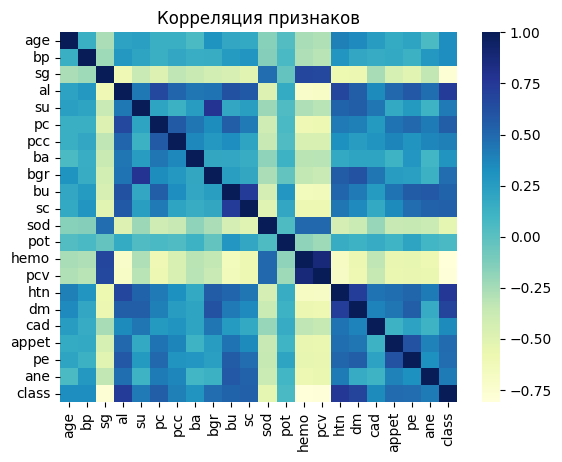

In [149]:
# Визуализируем эту таблицу.
heatmap = sns.heatmap(data=drop_df.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков')
;

In [150]:
# Посмотрим признаки, у которых корреляция по абсолютной величине > 0.8.
corr = drop_df.corr(numeric_only=True).round(3)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,hemo,pcv,class
hemo,1.000,0.877,-0.808
pcv,0.877,1.000,-0.797
class,-0.808,-0.797,1.000


Признак `'hemo'` (уровень гемоглобина) и `'pcv'` (гематокрит) сильно коррелируют. Помимо этого признак `'hemo'` сильно коррелирует с целевой переменной `'class'`. 

In [ ]:
# Удалим признак 'hemo'.
drop_df.drop(columns=['hemo'], axis=1, inplace=True)

1. Разведочный анализ данных (EDA)

    * Подсчет пропусков и выявление аномалий.
    * Визуализация распределения признаков (гистограммы, боксплоты и так далее).
    * Анализ корреляции между признаками.
    * Сделайте выводы из анализа, выберите целевую переменную, сформулируйте гипотезу.

2. Предобработка данных

    * Очистите данные: обработайте пропуски, выбросы и категориальные переменные.
    * Нормализуйте и/или стандартизируйте данные, если это необходимо.

3. Построение моделей машинного обучения

    * Выберите как минимум три различных алгоритма машинного обучения (например, логистическую регрессию, решающие деревья, случайный лес, градиентный бустинг и так далее).
    * Обучите модели на тренировочных данных, используя кросс-валидацию для оценки их производительности.

4. Оценка моделей

    * Оцените качество построенных моделей с помощью метрик, которые были рассмотрены на занятиях (точность, полнота, F1-мера и ROC-AUC и так далее).
    * Сравните результаты моделей и выберите наилучшую по производительности.

5. Подбор гиперпараметров

    * Оптимизируйте производительность моделей путем подбора гиперпараметров.

6. Оценка важности признаков

    * Проанализируйте важность признаков для одной выбранной модели.

7. Заключение

    * Сформулируйте выводы на основе полученных результатов и дайте рекомендации по дальнейшим шагам в исследовании или практике.